In [2]:
def find_intersection(ft, label ,test_index, train_index):
    """
    For each test point, find all the training samples with overlapping
    """
    test_index.sort()
    result_arr = []
    for i, pt in enumerate(test_index):
        if np.mean(np.var(ft[pt], -1)) < 1e-2:
            continue
        if np.sum(label[pt][:,1]) == 4:
            continue
        related_ind = np.where(
            np.logical_and(train_index < pt + 15, train_index > pt-15))[0]
        sel_train_index = train_index[related_ind]
        mm = find_correlation(ft, pt, sel_train_index)
        result_arr.append(np.squeeze(mm))

        for idx, m in enumerate(np.squeeze(mm)):
            if m > 0.9:
                print(np.mean(np.var(ft[pt], -1)), np.sum(label[pt][:,1]))
                #print(ft[sel_train_index][idx])
    return np.concatenate(result_arr, -1)

In [3]:
'''
def find_intersection(ft, test_index, train_index):
    """
    For each test point, find all the training samples with overlapping
    """
    test_index.sort()
    result_arr = []
    for i, pt in enumerate(test_index):
        related_ind = np.where(
            np.logical_and(train_index < pt + 15, train_index > pt-15))[0]
        sel_train_index = train_index[related_ind]
        mm = find_correlation(ft, pt, sel_train_index)
        result_arr.append(np.median(mm))
    #return np.concatenate(result_arr, -1)
    return np.array(result_arr)
'''

'\ndef find_intersection(ft, test_index, train_index):\n    """\n    For each test point, find all the training samples with overlapping\n    """\n    test_index.sort()\n    result_arr = []\n    for i, pt in enumerate(test_index):\n        related_ind = np.where(\n            np.logical_and(train_index < pt + 15, train_index > pt-15))[0]\n        sel_train_index = train_index[related_ind]\n        mm = find_correlation(ft, pt, sel_train_index)\n        result_arr.append(np.median(mm))\n    #return np.concatenate(result_arr, -1)\n    return np.array(result_arr)\n'

In [4]:
import scipy.linalg as LA
from scipy.spatial.distance import cdist
def find_correlation(ft, ind1, sel_train_index):
    ## ind2 is a list
    if len(sel_train_index) == 0:
        return None      
    result_list = []
    test_data = np.expand_dims(ft[ind1].flatten(), axis=0)
    #test_data = test_data - np.mean(test_data, -1)
    cor_train_data = ft[sel_train_index]
    #cor_train_data = cor_train_data - np.expand_dims(np.mean(cor_train_data, -1), axis=-1)
    num_neuron = cor_train_data.shape[1]
    time_len = cor_train_data.shape[2]
    if len(sel_train_index) == 1:
        cor_train_data = np.expand_dims(cor_train_data.flatten(), axis=0)
    else:
        cor_train_data = np.reshape(cor_train_data, (-1, num_neuron*time_len))
    #print(test_data.shape, cor_train_data.shape)
    Y = 1-cdist(test_data, cor_train_data, 'correlation')
    #print(ind1, sel_train_index)
    #print(Y)
    #print(cor_train_data.shape, Y.shape)
    return Y



In [5]:
def get_channel_mean(data):
    full_data = data[::15,:,:]
    full_data = full_data.transpose(1,0,2)
    full_data = full_data.reshape(full_data.shape[0], -1)
    channel_mean = np.mean(full_data, -1)
    channel_mean = np.expand_dims(np.expand_dims(channel_mean, 0), 2)
    return channel_mean

In [10]:
import numpy as np 
import random
import matplotlib.pylab as plt
from scipy.io import savemat
data_dir = "/media/yipeng/data/movie/Movie_Analysis/training_data_1_zero"
patient_names = os.listdir(data_dir)#/431"
res = {}
for pt in patient_names:
    frame_data = np.load(os.path.join(data_dir, pt, "frame_number.npy"))[:-300] ## rate 30fps, get rid of the last 300
    ft_data = np.load(os.path.join(data_dir, pt, "feature.npy"))[:-300] ## frame_len, neuron_num, 30 (2s)
    label = np.load(os.path.join(data_dir, pt, "label.npy"))[:-300] ## frame_len, neuron_num, 30 (2s)
    
    index = np.arange(len(label))
    random.shuffle(index)
    label = label[index]

    #print(ft_data[0][0])
    channel_mean = get_channel_mean(ft_data)    
    #print(channel_mean[0][0])
    #ft_data = ft_data - channel_mean
    #print(ft_data[0][0])
    num_frame = len(frame_data)
    index = np.arange(num_frame)
    fixed_test_len = int(0.2*num_frame)
    fixed_train_len = int(0.7*num_frame)
    random.shuffle(index)
    test_index = index[:fixed_test_len]
    train_index = index[fixed_test_len:(fixed_train_len+fixed_test_len)]
    res_arr = find_intersection(ft_data, label ,test_index, train_index)
    print(res_arr.shape)
    #print(res_arr.shape)
    #plt.figure(figsize=(20,10))
    #plt.figure()
    #plt.plot(res_arr)
    #plt.hist(res_arr)
    #plt.title(pt)
    res[pt] = res_arr
savemat("/media/yipeng/data/movie/Movie_Analysis/final_result_outputs/LSTM_shuffle_label/shuffle_label_no_mean_normalize.mat", res)

(33312,)
(33095,)
(30600,)
(32400,)
(33748,)
(34051,)
(33613,)
(33417,)
(33173,)
(33104,)


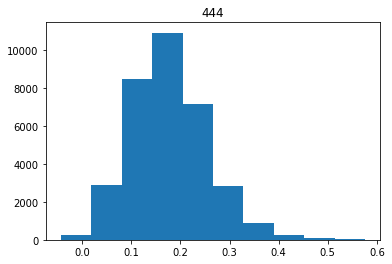

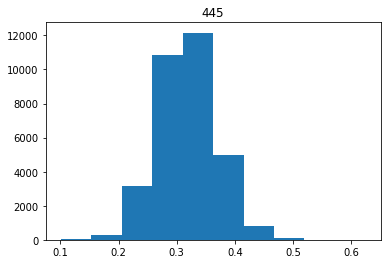

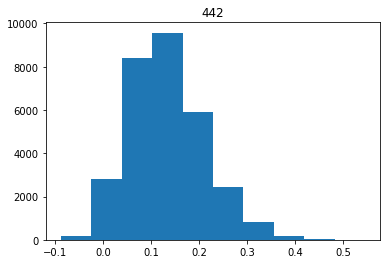

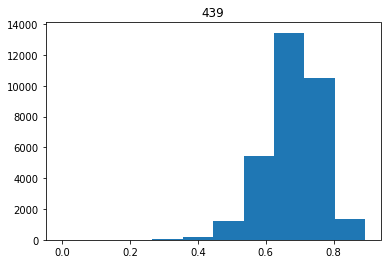

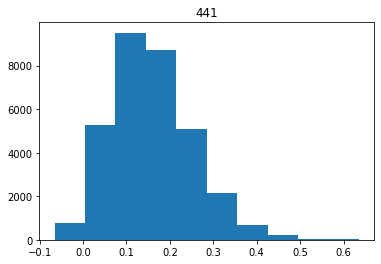

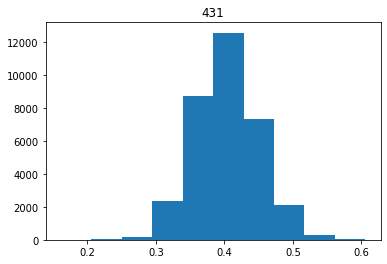

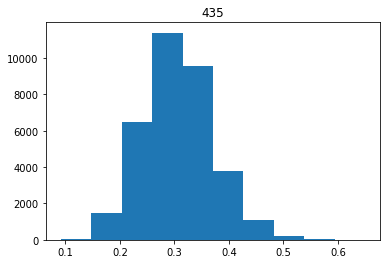

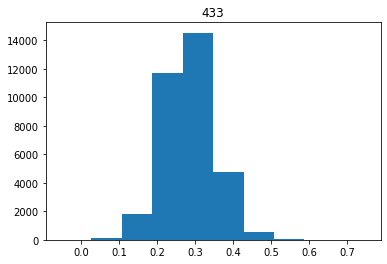

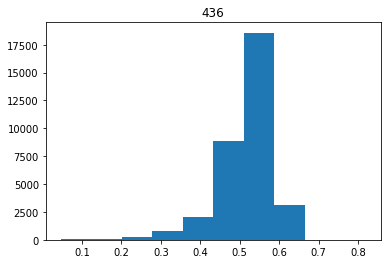

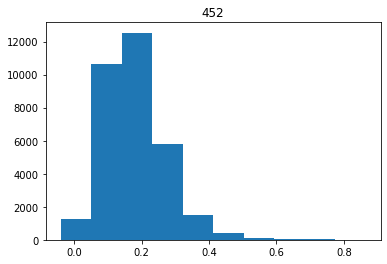

In [11]:
import numpy as np 
import random
import matplotlib.pylab as plt
data_dir = "/media/yipeng/data/movie/Movie_Analysis/training_data_1_zero"
patient_names = os.listdir(data_dir)#/431"
for pt in patient_names:
    frame_data = np.load(os.path.join(data_dir, pt, "frame_number.npy"))[:-300] ## rate 30fps, get rid of the last 300
    ft_data = np.load(os.path.join(data_dir, pt, "feature.npy"))[:-300] ## frame_len, neuron_num, 30 (2s)
    label = np.load(os.path.join(data_dir, pt, "label.npy"))[:-300] ## frame_len, neuron_num, 30 (2s)
    
    index = np.arange(len(label))
    random.shuffle(index)
    label = label[index]
    #print(ft_data[0][0])
    channel_mean = get_channel_mean(ft_data)    
    #print(channel_mean[0][0])
    #ft_data = ft_data - channel_mean
    #print(ft_data[0][0])
    num_frame = len(frame_data)
    index = np.arange(num_frame)
    fixed_test_len = int(0.2*num_frame)
    fixed_train_len = int(0.7*num_frame)
    random.shuffle(index)
    test_index = index[:fixed_test_len]
    train_index = index[fixed_test_len:(fixed_train_len+fixed_test_len)]
    res_arr = find_intersection(ft_data, label ,test_index, train_index)
    #print(res_arr.shape)
    #plt.figure(figsize=(20,10))
    plt.figure()
    #plt.plot(res_arr)
    plt.hist(res_arr)
    plt.title(pt)

In [145]:
np.mean(full_data.transpose((0,2,1)).reshape(-1, 50), axis=0)

array([ 5.66132246e-17,  1.51411231e-16, -2.81685633e-15,  3.40853402e-15,
        1.37051473e-15,  1.07463488e-14, -6.21268851e-16,  2.50847920e-15,
        3.03372502e-15,  4.27030347e-15, -4.93932026e-15, -5.48037415e-17,
        3.02244445e-15, -1.53700317e-15,  3.98554216e-16,  2.82886803e-16,
       -2.60771605e-16, -1.58864460e-16, -1.34602378e-16, -1.67295881e-16,
       -1.11368573e-15, -3.83338193e-16,  3.39114412e-15, -2.69661885e-15,
       -3.27322626e-14,  1.16800971e-17,  4.77870171e-15, -3.41750069e-16,
       -5.72374462e-15,  4.92407715e-16, -1.09360523e-15,  1.06616741e-15,
       -1.73130643e-16, -2.23602675e-16,  1.46483269e-16, -6.29216204e-16,
       -3.19042407e-16,  1.09480700e-16,  2.21166127e-15, -2.28402638e-16,
       -9.89263208e-16, -5.25659763e-16, -3.64785681e-16, -8.83571204e-17,
       -5.77248511e-16, -2.85900440e-16, -4.96024248e-16, -9.74080354e-16,
       -6.97093483e-16,  4.65939989e-16])

In [146]:
full_data.shape[0]*30

37080

In [40]:
(frame_data[::15][-1] - frame_data[0])/60*30 + 30

37080.0

In [31]:
#frame_data[-1]/2

37102.0

In [24]:
print(frame_data[0],frame_data[13:15], frame_data[25:29], frame_data[30:35])

92 [144 148] [192 196 200 204] [212 216 220 224 228]


In [29]:
frame_data[0::15].shape

(1236,)

In [26]:
frame_data[15]

152

In [23]:
a = np.array([1,0,0,0,0]).reshape(1,-1)

In [24]:
b= np.array([0,2,0,0,0]).reshape(1,-1)

In [25]:
1- cdist(a,b, "correlation")

array([[-0.25]])

In [51]:
b.shape

(1, 5)